In [87]:
import pandas as pd
import datetime
from datetime import datetime
from pandas_datareader import data
from functools import reduce
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')
#!pip install pandas_ta

[*********************100%%**********************]  15 of 15 completed


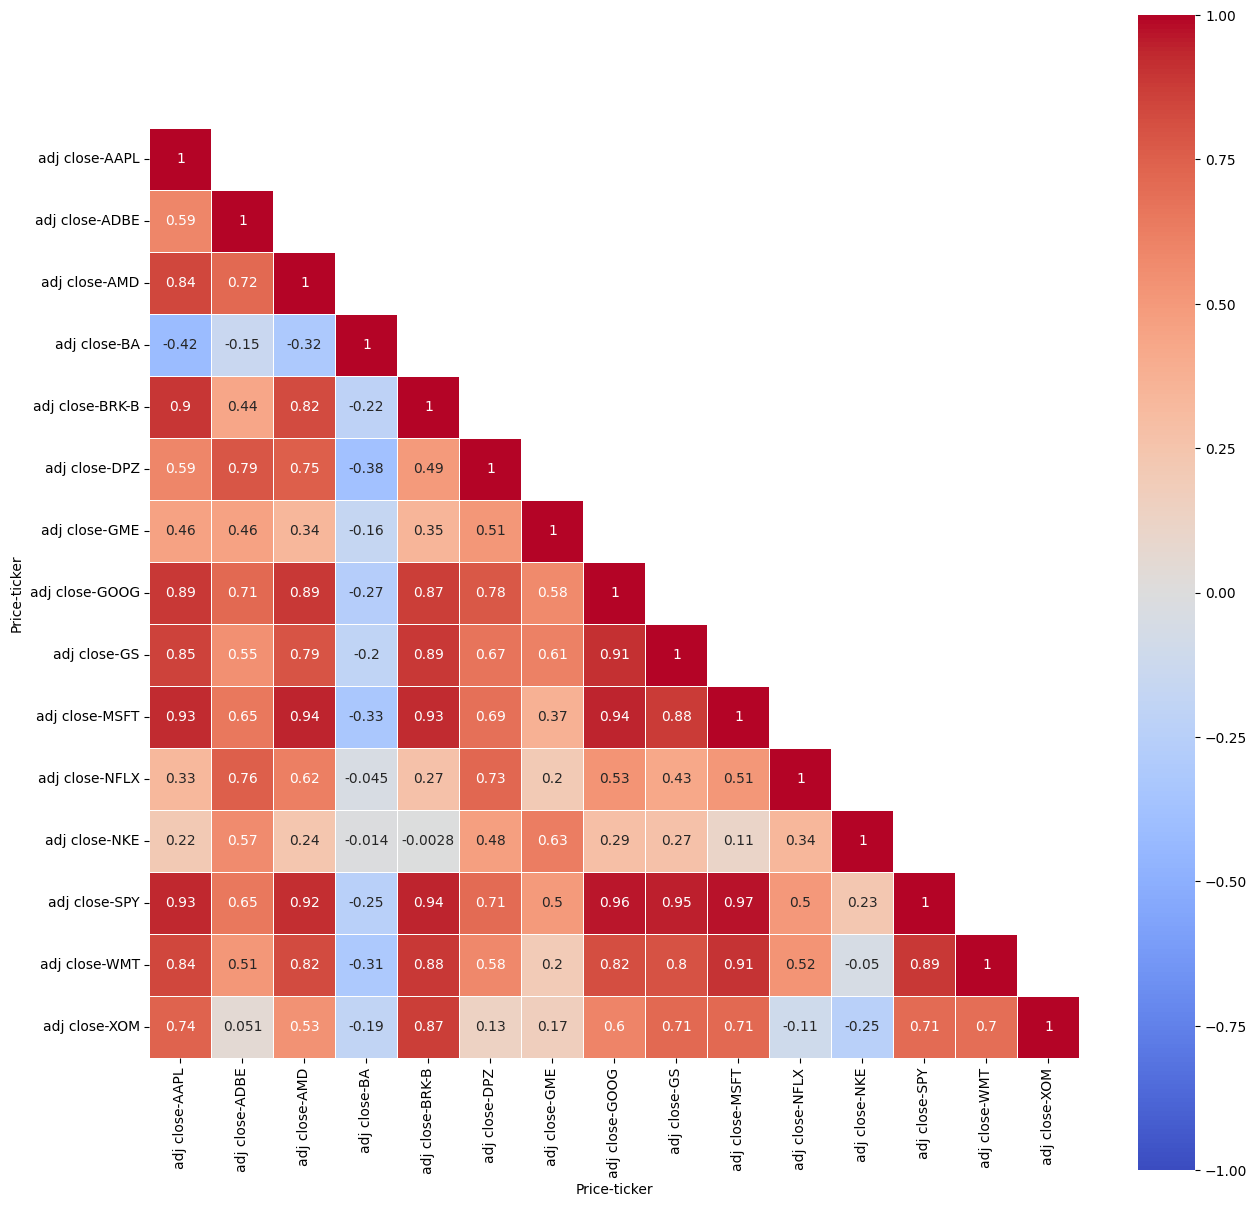

In [98]:
ticker_list=["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","ADBE","GS","XOM","NKE","BRK-B", "MSFT"]
end_date='2024-08-14'
start_date=pd.to_datetime(end_date)-pd.DateOffset(365*5)
df=yf.download(tickers=ticker_list,
               start=start_date,
               end=end_date).stack()
df1=pd.DataFrame(df)
df.index.names=['date','ticker']
df.columns=df.columns.str.lower()
df


df1.index.names=['date','ticker']
df1.columns=df1.columns.str.lower()
df1
df1=df1.drop(columns=['close','high','low','open','volume'])
df2=df1.unstack()
df2


plt.figure(figsize=(15,15))
mask_upper = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(df2.corr(),annot=True,mask=mask_upper, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)
plt.show()

In [128]:
%%capture
df2_reset=df2.reset_index()
df_reset_drop = df2.reset_index(drop=True)
df_reset_drop

In [129]:
%%capture
# Flatten MultiIndex columns
df_flat = df2.copy()
df_flat.columns = [f'{col[0]}_{col[1]}' for col in df_flat.columns]

# Display the DataFrame to confirm
print(df_flat.head())

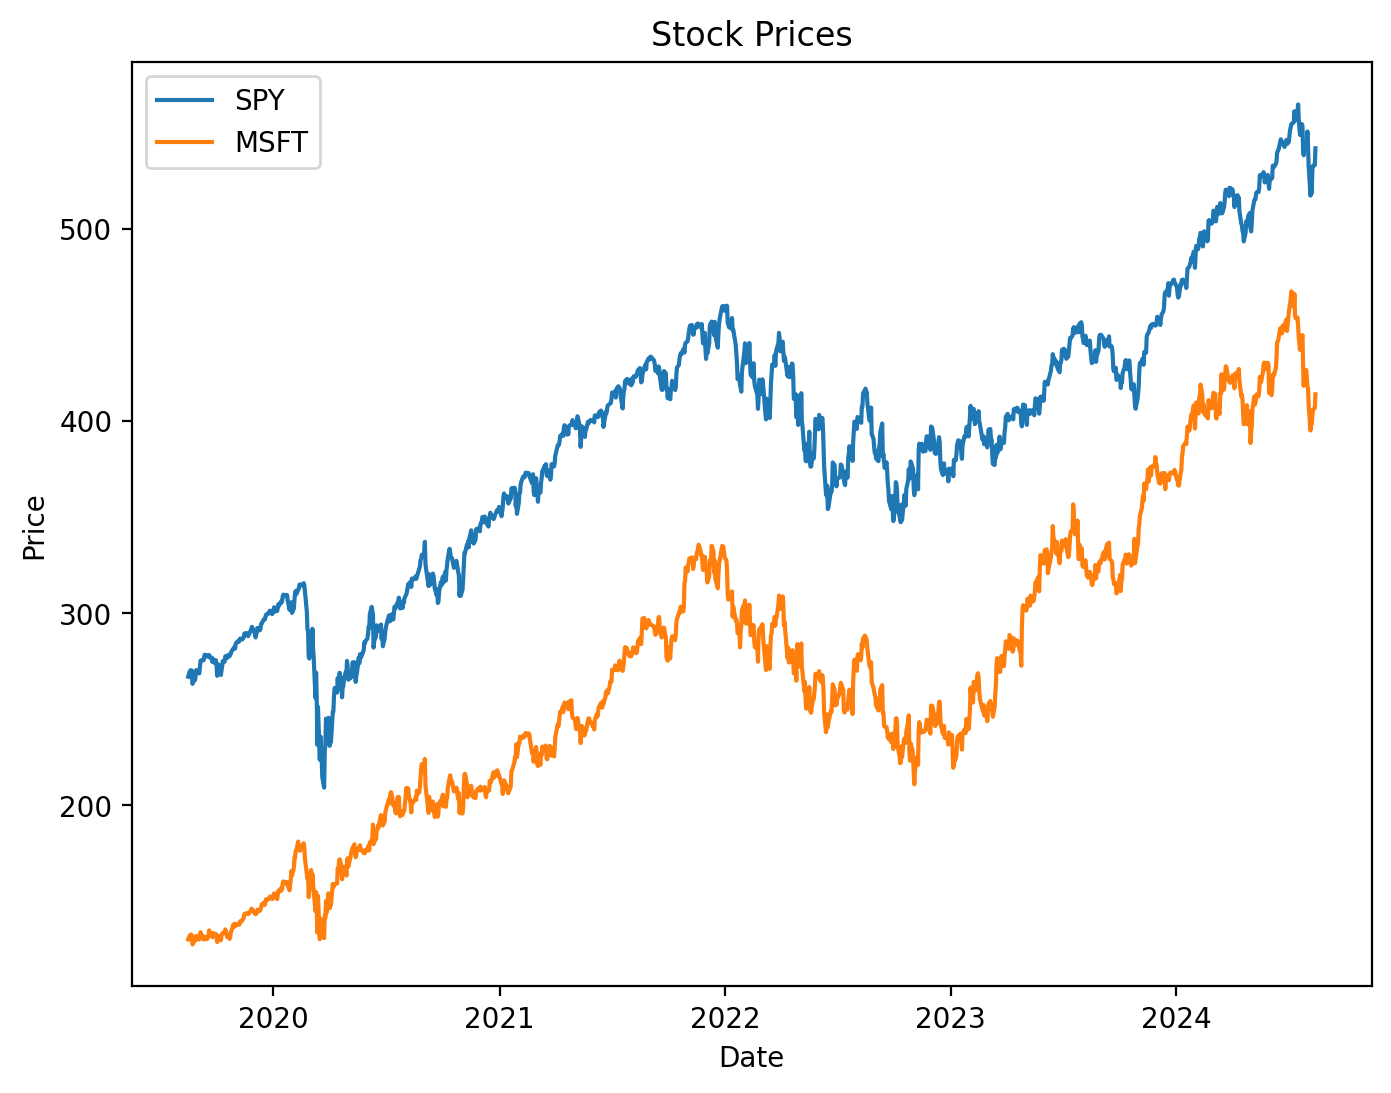

In [130]:
# Example plot for specific stocks
plt.figure(figsize=(8, 6), dpi=200)

# Plotting 'SPY' and 'MSFT'
plt.plot(df_flat['adj close_SPY'], label='SPY')
plt.plot(df_flat['adj close_MSFT'], label='MSFT')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices')
plt.legend()
plt.show()

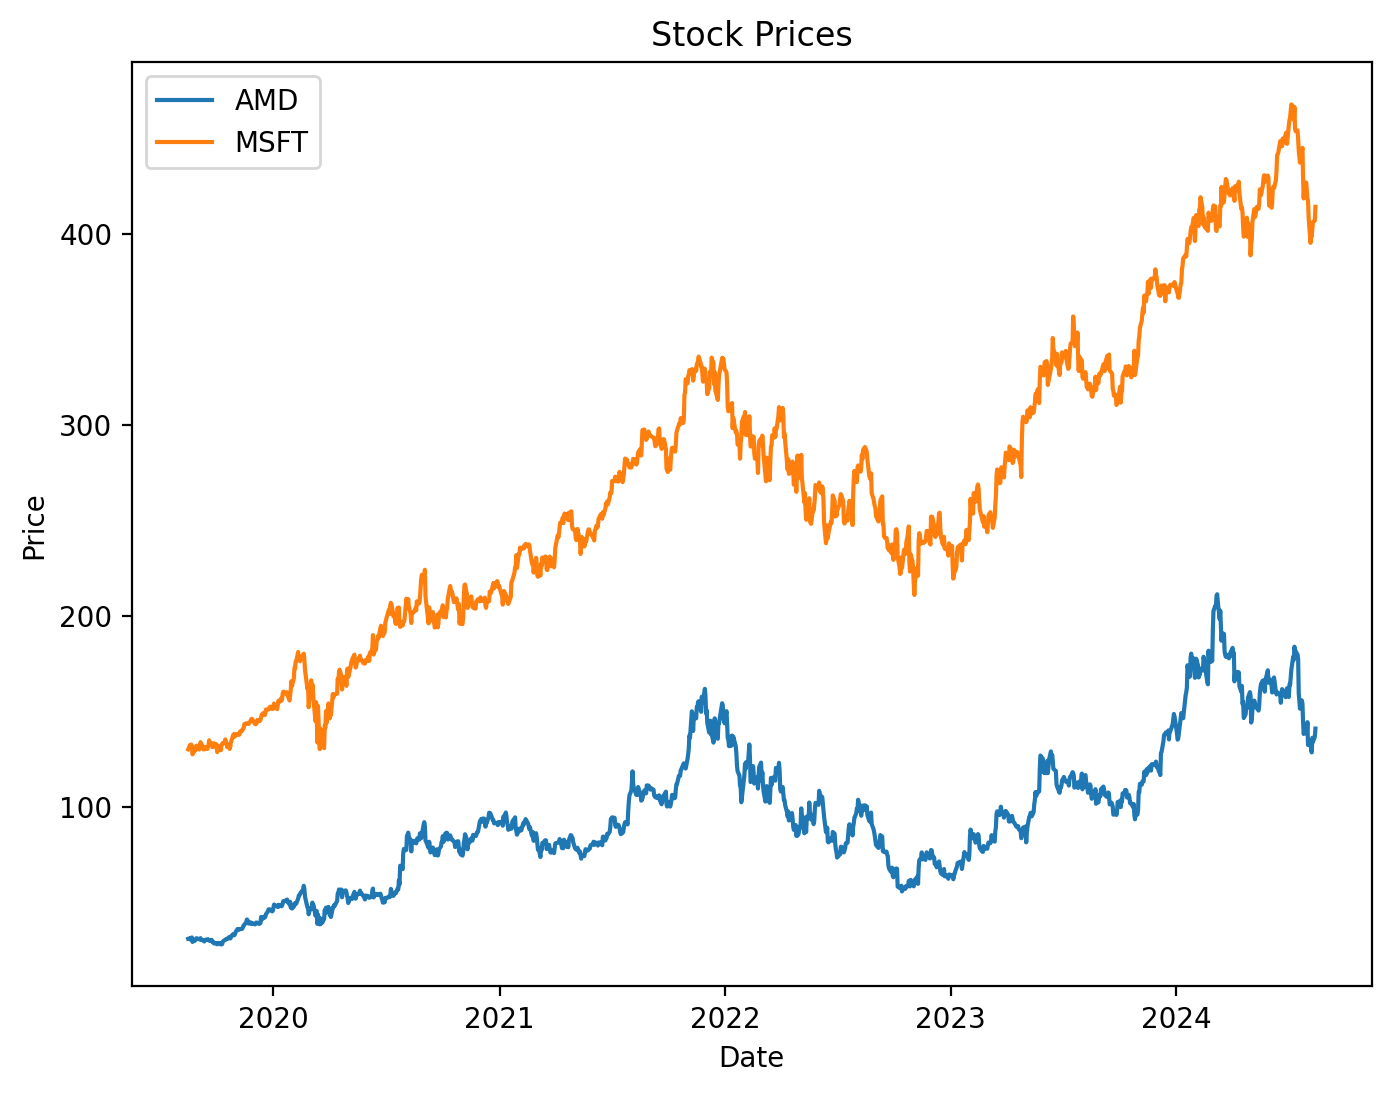

In [114]:
# Example plot for specific stocks
plt.figure(figsize=(8, 6), dpi=200)

# Plotting 'SPY' and 'MSFT'
plt.plot(df_flat['adj close_AMD'], label='AMD')
plt.plot(df_flat['adj close_MSFT'], label='MSFT')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Spread between MSFT and AMD ')

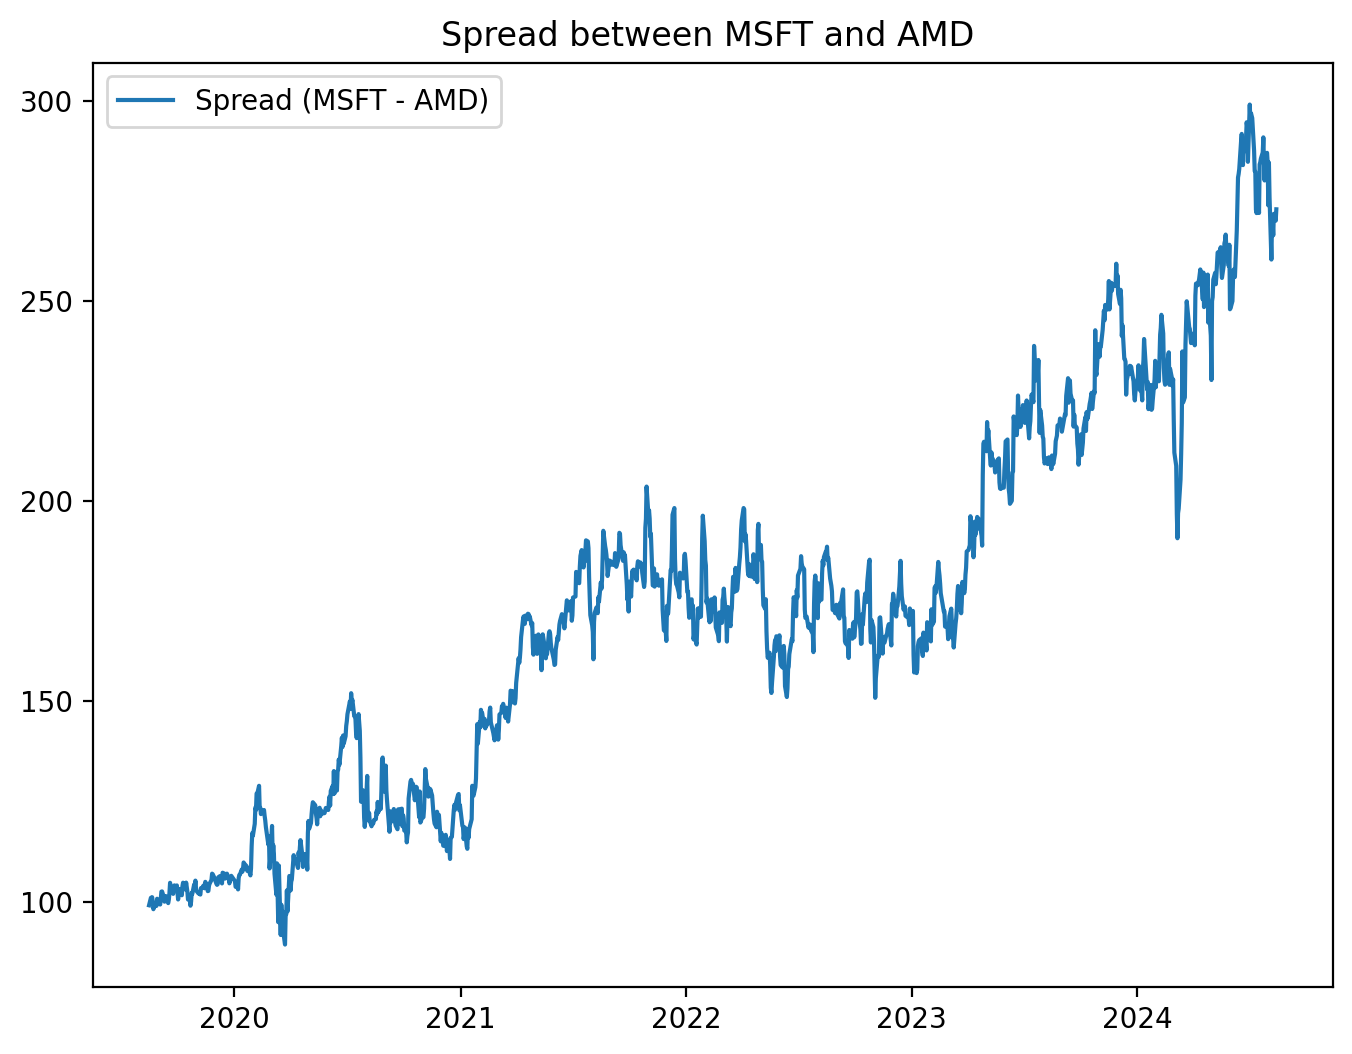

In [118]:

# Spread between microsoft and AMD
plt.figure(figsize=(8,6),dpi=200)
plt.plot(df_flat['adj close_MSFT']- df_flat['adj close_AMD'], label='Spread (MSFT - AMD)')
plt.legend()
plt.title("Spread between MSFT and AMD ")

In [134]:
import statsmodels.tsa.stattools as ts
# !pip install statsmodels
result=ts.coint(df_flat['adj close_MSFT'],df_flat['adj close_AMD'])
cointegration_t_statistic=result[0]
p_val=result[1]
p_val # if p_val <0.05 then there is existing cointegration


0.047193781739799254

In [135]:
from statsmodels.tsa.stattools import adfuller

msft_adf=adfuller(df_flat['adj close_MSFT'])
print ('P value for MSFT ADF Test is ', msft_adf[1])
amd_adf=adfuller(df_flat['adj close_AMD'])
print ('P value for AMD ADF Test is ', amd_adf[1])
spread_adf=adfuller(df_flat['adj close_MSFT']- df_flat['adj close_AMD'])
print ('P value for Spread ADF Test is',spread_adf[1])
ratio_adf=adfuller(df_flat['adj close_MSFT']/df_flat['adj close_AMD'])
print ('P value for the ratio ADF is ', ratio_adf[1])

P value for MSFT ADF Test is  0.7990508942067349
P value for AMD ADF Test is  0.3983557247983047
P value for Spread ADF Test is 0.8106632324351173
P value for the ratio ADF is  0.01953104369183816


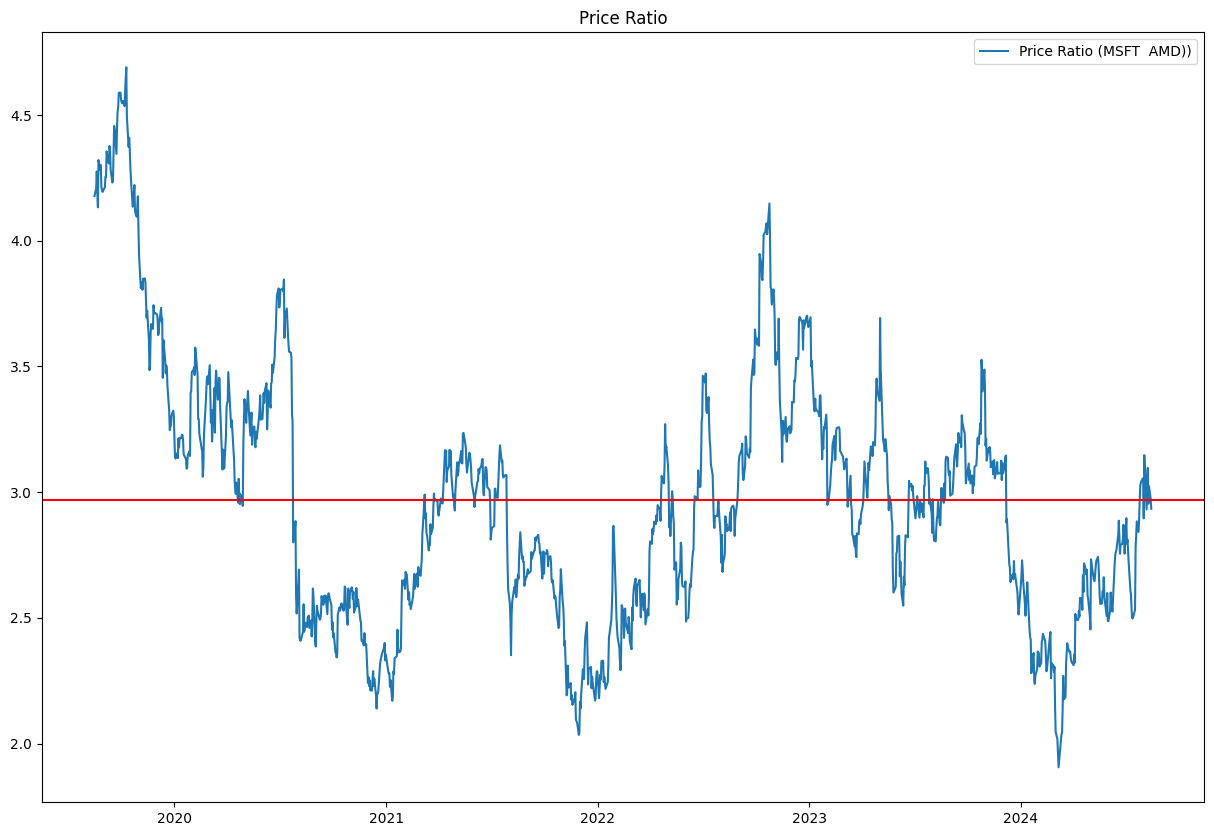

In [149]:
#Ratio Analysis
plt.figure(figsize=(15,10))
ratio=(df_flat['adj close_MSFT']/df_flat['adj close_AMD'])
plt.plot(ratio, label = 'Price Ratio (MSFT  AMD))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio")
plt.show()

In [140]:
from statsmodels.tsa.stattools import coint, adfuller
S1=df_flat['adj close_MSFT']
S2=df_flat['adj close_AMD']
score,pvalue,_=coint(S1,S2)
pvalue

0.047193781739799254

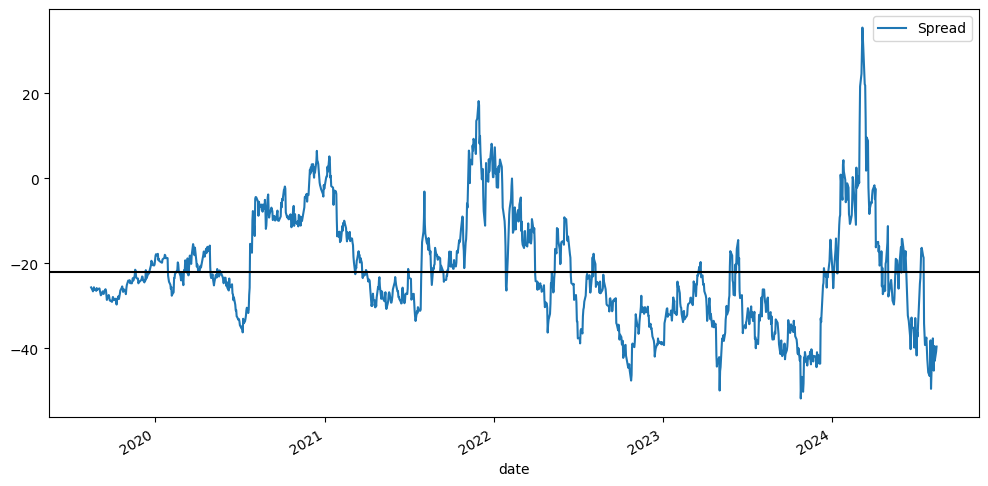

In [143]:
import statsmodels.api as sm
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['adj close_MSFT']
b = results.params['adj close_MSFT']

spread = S2 - b * S1
spread.plot(figsize=(12,6))
plt.axhline(spread.mean(), color='black')

plt.legend(['Spread']);

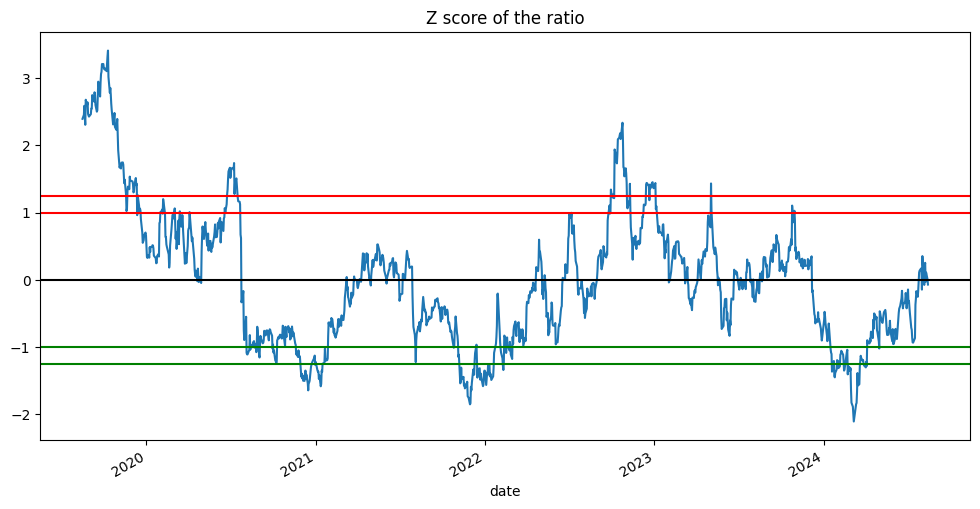

In [153]:
# z score ration
def zscore (series):
    return(series-series.mean())/np.std(series)

zscore(ratio).plot(figsize=(12,6))
plt.axhline(zscore(ratio).mean(),color='black')
plt.axhline(1, color='red')
plt.axhline(1.25, color='red')
plt.axhline(-1, color='green')
plt.axhline(-1.25, color='green')
plt.title('Z score of the ratio')
plt.show()

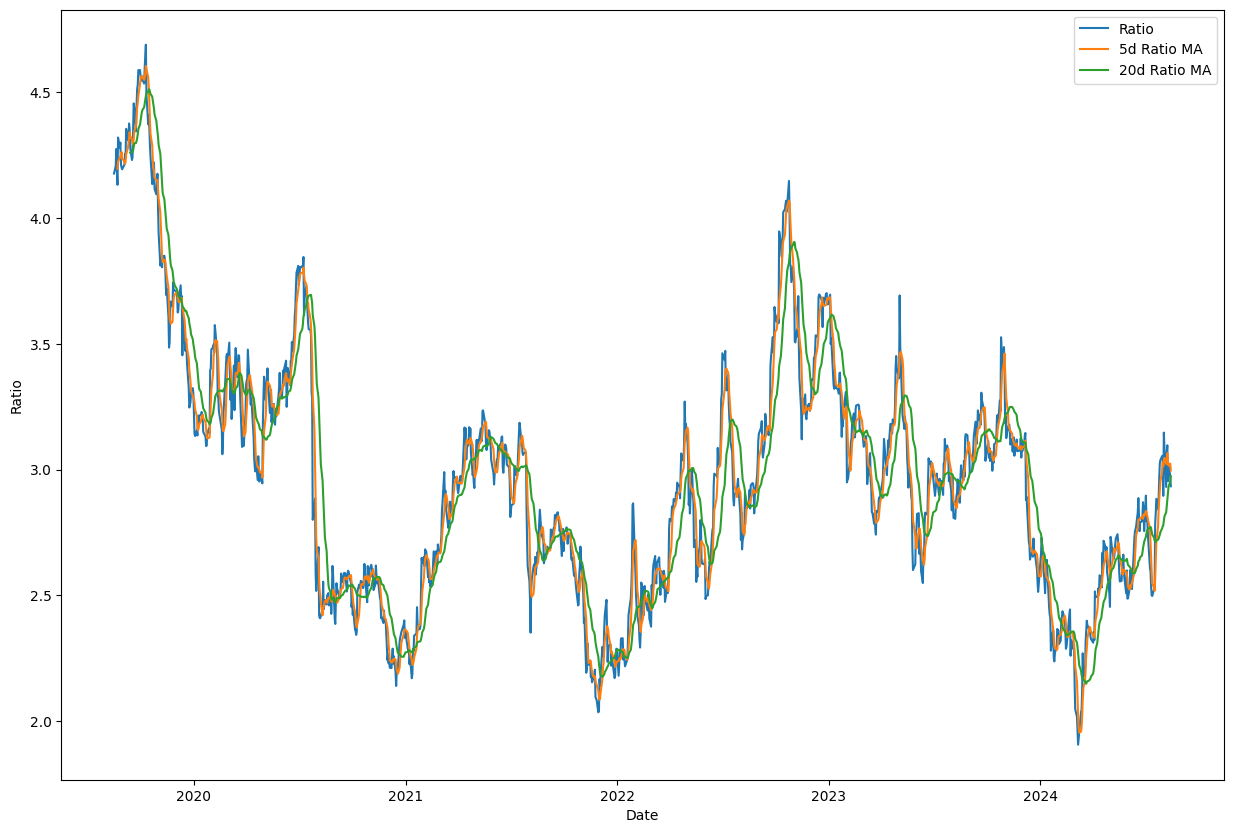

In [157]:
plt.figure(figsize=(15,10))
ratio_mavg5=ratio.rolling(window=5,center=False).mean()
ratio_mavg20=ratio.rolling(window=20,center=False).mean()

std_20=ratio.rolling(window=20,center=False).std()
zscore_20_5=(ratio_mavg5-ratio_mavg20)/std_20

plt.plot(ratio.index,ratio.values)
plt.plot(ratio_mavg5.index, ratio_mavg5.values)
plt.plot(ratio_mavg20.index, ratio_mavg20.values)
plt.legend(['Ratio','5d Ratio MA','20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.show()


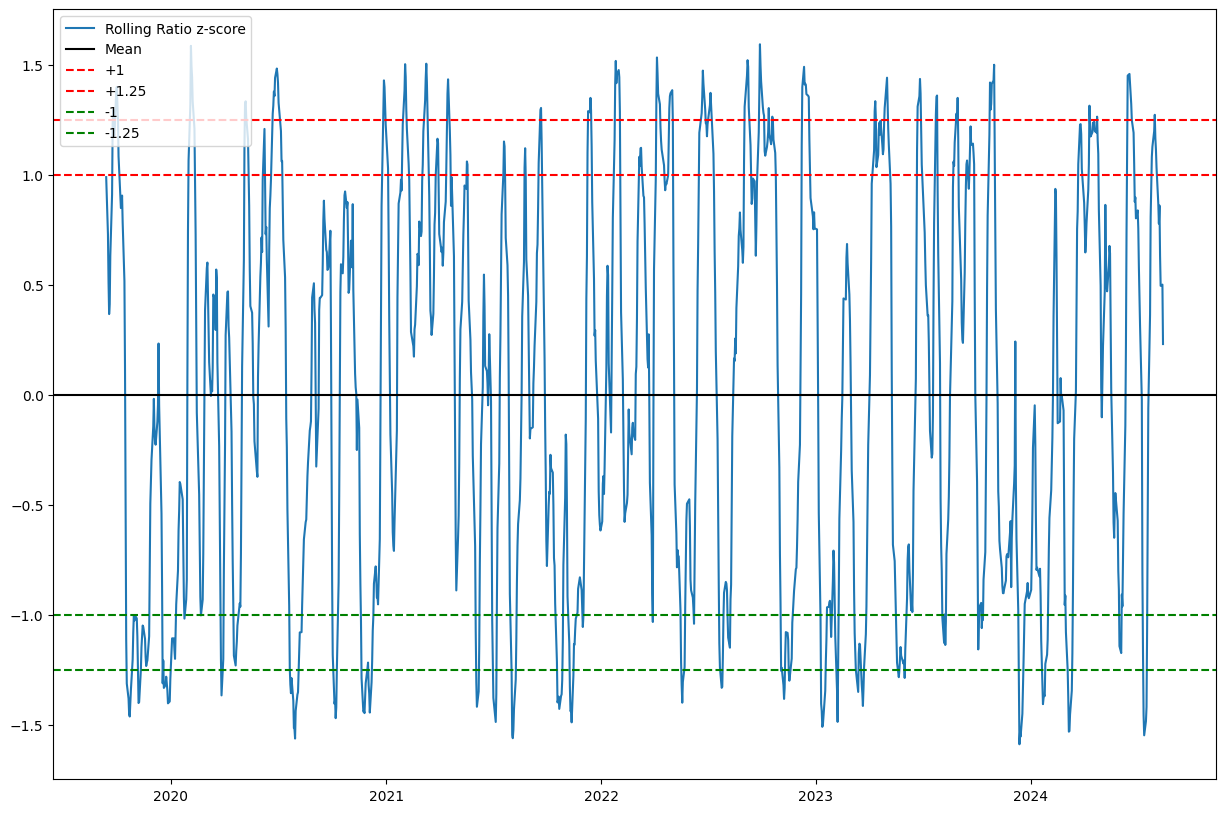

In [160]:
plt.figure(figsize=(15,10))
plt.plot(zscore_20_5)
plt.axhline(0, color='black')
plt.axhline(1,color='red',linestyle='--')
plt.axhline(1.25,color='red',linestyle='--')
plt.axhline(-1,color='green',linestyle='--')
plt.axhline(-1.25,color='green',linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

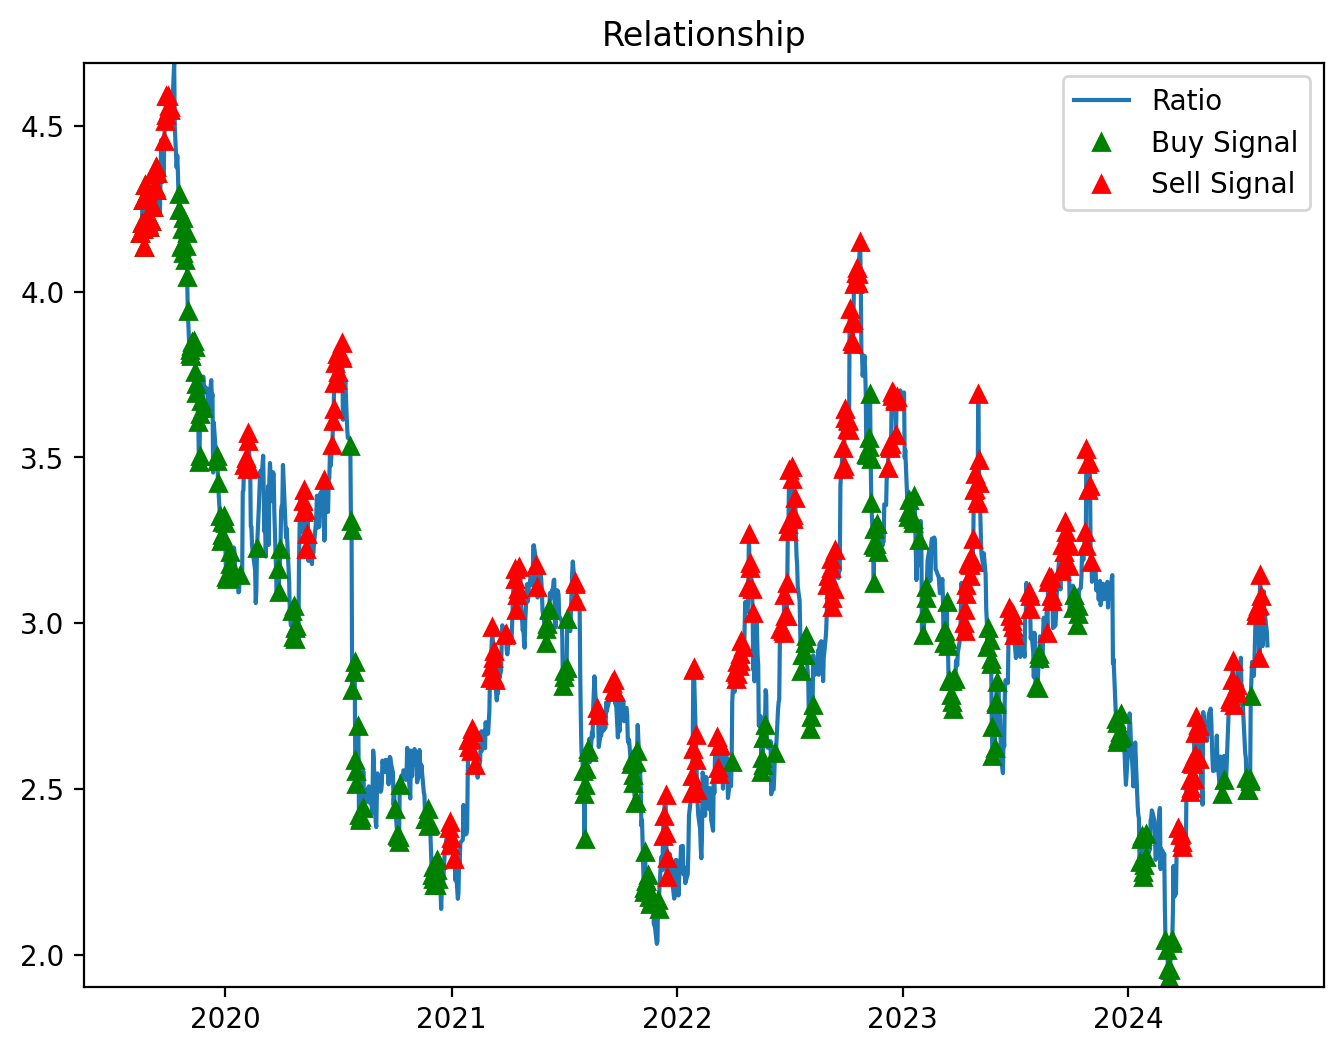

In [161]:
plt.figure(figsize=(8,6),dpi=200)
plt.plot(ratio)
buy=ratio.copy()
sell=ratio.copy()
buy[zscore_20_5>-1]=0
sell[zscore_20_5<1]=0

plt.plot(buy, color='g', linestyle = 'None', marker='^')
plt.plot(sell,color='r',linestyle='None',marker='^')

x1,x2,y1,y2=plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio','Buy Signal','Sell Signal'])
plt.title('Relationship')
plt.show()